In [4]:
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']


data = pd.read_csv('E:/databag/bag2/SpectralClustering聚类(2到7)结果((自创)弧度化黄金分割非线性变化).csv',index_col=0)

data1=data.drop('4个簇',axis=1)
data1
data2=data1.drop('5个簇',axis=1)
data3=data2.drop('6个簇',axis=1)
data4=data3.drop('7个簇',axis=1)
data5=data4.drop('3个簇',axis=1)
data6=data5.drop('2个簇',axis=1)
data6

,性别,肺活量,身高(cm),体重(kg),谷丙转氨酶(ALT)(U/L),总胆红素(TBIL)(umol/L),平均血小板体积(MPV)(fl),白细胞计数(WBC)(10^9/L),中性粒细胞绝对值(NE#)(10^9/L),中性粒细胞比值(NE%)(%),...,平均红细胞血红蛋白浓度(MCHC)(g/L),红细胞分布宽度变异系数(RDW_CV)(%),血小板计数(PLT)(10^9/L),血小板分布宽度(PDW)(%),大血小板比率(P-LCR)(%),中间细胞百分比(MID%)(%),中间细胞绝对值(MID#)(10^9/L),红细胞分布宽度(RDW-SD)(%),血压-高(mmHg),血压-低(mmHg)
0,0.000000,0.154500,-0.054050,-0.110674,0.045144,0.046987,-2.142578,-0.763553,-0.760038,-0.364394,...,1.132936,-0.895599,-0.150272,-0.770171,-1.796971,-0.673422,-1.175546,-1.204556,-0.032905,-0.518791
1,0.000000,-0.327086,0.196461,-0.222389,0.053977,-1.575769,0.770171,-0.362602,-0.630517,-0.599863,...,0.395922,-1.097031,-0.057656,-1.191308,-0.207050,0.321840,0.435899,-0.504984,-0.032905,0.781583
2,0.000000,0.154500,-0.054050,0.083955,-0.926325,-1.714980,0.419813,-0.763553,-0.970953,-0.650651,...,0.249034,-1.276713,-0.011526,-0.285297,-0.028677,0.146004,-0.343917,0.084796,0.349924,-0.062786
3,0.000000,-0.499087,0.130618,0.016776,0.015129,-1.191308,1.357663,-1.057092,-1.296711,-0.761721,...,-0.789994,-1.478151,0.011196,-2.126027,2.522958,-0.022006,-0.720380,-0.599587,-0.148466,-0.062786
4,0.000000,0.077075,0.196461,0.050344,0.030260,0.035416,0.102827,-0.316050,-0.054678,0.340102,...,-0.461010,-1.589047,-0.046118,0.419813,0.367186,0.120682,0.435899,0.273664,0.028721,-0.812590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4046,2.802458,-0.411993,0.196461,0.202356,-1.064175,-0.257143,0.419813,0.379498,0.624299,1.755105,...,0.754486,-0.644670,-0.150272,0.085654,0.376533,-0.834137,-0.720380,-0.208227,0.472253,0.708110
4047,0.000000,-1.103134,-0.064870,0.219417,-1.439898,-1.375256,-0.200352,-2.333481,-1.590900,-0.252417,...,0.754486,-0.058452,0.011196,-0.154500,-0.196461,-0.176736,-1.796971,-0.433542,-0.231870,1.039825
4048,0.000000,-0.161905,-0.054050,0.185339,0.066531,-1.360582,-0.868848,0.621092,0.458585,0.021911,...,-0.040837,0.990091,0.524895,-0.154500,-0.751843,0.294405,0.635018,0.601729,-0.032905,0.365441
4049,0.000000,-1.225587,-0.097370,-0.222389,-0.754486,-0.197797,-0.302457,-0.224365,-0.109481,-0.020131,...,0.588904,0.041335,-0.069200,-0.232633,-0.385003,-0.107983,-0.343917,0.867564,-0.545799,-0.812590


In [5]:
#存放设置不同簇数时的SSE值
sse_list =[]
# 轮廓系数
silhouettes = []
#Calinski-Harabaz Index
scores = []
#Davies-Bouldin Index
davies_list = []
# 循环设置不同的聚类簇数
for i in range(4, 10):
    y_pre = np.array(data.iloc[:,23+i])
    # 轮廓系数
    silhouette = metrics.silhouette_score(data4, y_pre, metric='euclidean')
    silhouettes.append(silhouette)
    #Davies-Bouldin Index
    davies_list.append(davies_bouldin_score(data4,y_pre))
    #Calinski-Harabaz Index
    score = calinski_harabasz_score(data4,y_pre)
    scores.append(score)

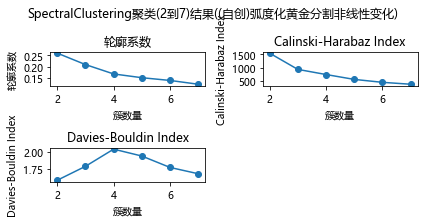

In [6]:

# 绘制轮廓系数曲线
plt.subplot(321)
plt.title('轮廓系数')
plt.plot(range(2, 8), silhouettes, marker='o')
plt.xlabel('簇数量')
plt.ylabel('轮廓系数')
# 绘制Calinski-Harabaz Index曲线
plt.subplot(322)
plt.title('Calinski-Harabaz Index')
plt.plot(range(2, 8),scores , marker='o')
plt.xlabel('簇数量')
plt.ylabel('Calinski-Harabaz Index')

# 绘制Davies-Bouldin Index曲线
plt.subplot(323)
plt.title('Davies-Bouldin Index')
plt.plot(range(2, 8),davies_list, marker='o')
plt.xlabel('簇数量')
plt.ylabel('Davies-Bouldin Index')

plt.suptitle('SpectralClustering聚类(2到7)结果((自创)弧度化黄金分割非线性变化)')
plt.tight_layout()
plt.show()